In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# Geração dos Dados
# Dados ...
observations = 1000
xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))
generated_inputs = np.column_stack((xs, zs))
noise = np.random.uniform(-1, 1, (observations, 1))
generated_targets = 2*xs + 3*zs + 5 + noise
np.savez("TF_intro", inputs=generated_inputs, targets=generated_targets)

In [3]:
# Solução Usando TensorFlow
training_data = np.load("TF_intro.npz")
input_size = 2
output_size = 1

# Modelo ...
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

# Função Objetiva e Algoritmo de Otimização ...
model.compile(optimizer="sgd", loss="mean_squared_error")

model.fit(training_data["inputs"], training_data["targets"], epochs=200, verbose=2)

Epoch 1/200
32/32 - 0s - loss: 46.9545 - 390ms/epoch - 12ms/step
Epoch 2/200
32/32 - 0s - loss: 4.2750 - 40ms/epoch - 1ms/step
Epoch 3/200
32/32 - 0s - loss: 1.4161 - 97ms/epoch - 3ms/step
Epoch 4/200
32/32 - 0s - loss: 0.6335 - 80ms/epoch - 2ms/step
Epoch 5/200
32/32 - 0s - loss: 0.4276 - 96ms/epoch - 3ms/step
Epoch 6/200
32/32 - 0s - loss: 0.3745 - 68ms/epoch - 2ms/step
Epoch 7/200
32/32 - 0s - loss: 0.3529 - 58ms/epoch - 2ms/step
Epoch 8/200
32/32 - 0s - loss: 0.3512 - 62ms/epoch - 2ms/step
Epoch 9/200
32/32 - 0s - loss: 0.3487 - 61ms/epoch - 2ms/step
Epoch 10/200
32/32 - 0s - loss: 0.3401 - 43ms/epoch - 1ms/step
Epoch 11/200
32/32 - 0s - loss: 0.3491 - 82ms/epoch - 3ms/step
Epoch 12/200
32/32 - 0s - loss: 0.3438 - 75ms/epoch - 2ms/step
Epoch 13/200
32/32 - 0s - loss: 0.3462 - 72ms/epoch - 2ms/step
Epoch 14/200
32/32 - 0s - loss: 0.3462 - 105ms/epoch - 3ms/step
Epoch 15/200
32/32 - 0s - loss: 0.3497 - 94ms/epoch - 3ms/step
Epoch 16/200
32/32 - 0s - loss: 0.3475 - 74ms/epoch - 2ms/st

In [4]:
# Verificação do Modelo Após o Treinamento
model.layers[0].get_weights()
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(f"weights: {weights}")
print(f"bias: {bias}")

weights: [[2.0340614]
 [3.004099 ]]
bias: [5.0065923]


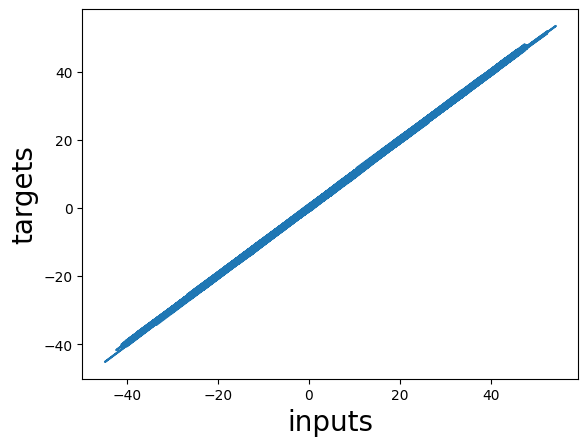

In [5]:
# Predição
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("inputs", fontsize=20)
plt.ylabel("targets", fontsize=20)
plt.show()